### Cnn Output Formula
Assuming a 2D CNN, the output size can be calculated using the following formula:

    output_size = ((input_size - filter_size + 2*padding)/stride) + 1

where:

    input_size: the size of the input image (height/width)
    filter_size: the size of the filter/kernel (height/width)
    padding: the number of pixels added to the borders of the input image
    stride: the step size for moving the filter over the input image
    
Note that the output size is rounded down to the nearest integer value, which can result in a loss of information at the borders of the image. Additionally, this formula assumes that the filter is applied to the input image in a single direction (e.g., horizontally or vertically), and that the output has the same depth (number of channels) as the input.

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from PIL import Image
import os

In [5]:
class MyDataset(Dataset):
    def __init__(self, root_dir='./data_test/'):
        self.root_dir = root_dir
        self.transform_in = transforms.Compose([transforms.Resize((64, 64)),
                                             transforms.ToTensor()])
        
        file_list = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]
        self.inputs=[f for f in file_list if f.startswith('input_')]
        self.outputs=[f for f in file_list if f.startswith('output_')]
        display(self.inputs)
        display(self.outputs)
        # Get list of all image file names in the root directory
        #self.file_list = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]

    def __len__(self):
        #return len(self.file_list)
        return len(self.inputs)

    def __getitem__(self, index):
        # Load input image (64x64)
        input_image_path = self.root_dir+self.inputs[index] #os.path.join(self.root_dir, self.file_list[index])
        input_image = Image.open(input_image_path)
        input_image = self.transform_in(input_image)
        #display(input_image.shape)

        # Load target image (512x512)
        target_image_path = self.root_dir+self.outputs[index] #os.path.join(self.root_dir, self.file_list[index].replace('input', 'target'))
        target_image = Image.open(target_image_path)
        #target_image = self.transform_out(target_image)
        #display(target_image.shape)
        target_image = transforms.ToTensor()(target_image)

        return input_image, target_image
    
    
    

In [4]:
class TestDataset(Dataset):
    def __init__(self, root_dir='./data_test/'):
        self.root_dir = root_dir
        self.transform_in = transforms.Compose([transforms.Resize((64, 64)),
                                             transforms.ToTensor()])
        
        file_list = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]
        self.inputs=[f for f in file_list if f.startswith('test_')]
        # Get list of all image file names in the root directory
        #self.file_list = [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]

    def __len__(self):
        #return len(self.file_list)
        return len(self.inputs)

    def __getitem__(self, index):
        # Load input image (64x64)
        input_image_path = self.root_dir+self.inputs[index] #os.path.join(self.root_dir, self.file_list[index])
        input_image = Image.open(input_image_path)
        input_image = self.transform_in(input_image)
        #display(input_image.shape)


        return input_image, 

In [149]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.Sigmoid(),
            nn.Upsample(size=(512, 512), mode='bilinear', align_corners=False)
        
        )
        

    def forward(self, x):
        encoded = self.encoder(x)
        #encoded = self.upsample(encoded)
        decoded = self.decoder(encoded)
        return encoded, decoded




In [31]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1,output_padding=1),
            nn.Sigmoid()
        
        )
        

    def forward(self, x):
        encoded = self.encoder(x)
        #encoded = self.upsample(encoded)
        decoded = self.decoder(encoded)
        return encoded, decoded

    """
            nn.Upsample(size=(512, 512), mode='bilinear', align_corners=False)
    """



In [32]:

# Hyperparameters
num_epochs = 10
batch_size = 128


In [33]:
learning_rate=0.01
model = Autoencoder()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [34]:
my_dataset = MyDataset()
my_dataloader = torch.utils.data.DataLoader(my_dataset, batch_size=batch_size, shuffle=True)

['input_1.jpg', 'input_2.jpg', 'input_3.jpg', 'input_4.jpg']

['output_1.jpg', 'output_2.jpg', 'output_3.jpg', 'output_4.jpg']

In [35]:

num_epochs=10
learning_rate = 0.0001
main_bar = tqdm(total=num_epochs,desc='Main Process')
sub_bar = tqdm(total=len(my_dataloader),desc='Sub Process')
# Train the model
for epoch in range(num_epochs):
    main_bar.update(1)
    sub_bar.reset()
    for data in my_dataloader:
        sub_bar.update(1)
        img, output_img = data
        _, recon = model(img)
        loss = criterion(recon, output_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1)%10==0:
        print('Epoch [{}/{}], Loss: {:.4f}'
          .format(epoch+1, num_epochs, loss.item()))

Main Process:   0%|          | 0/10 [00:00<?, ?it/s]

Sub Process:   0%|          | 0/1 [00:00<?, ?it/s]

RuntimeError: output padding must be smaller than either stride or dilation, but got output_padding_height: 1 output_padding_width: 1 stride_height: 1 stride_width: 1 dilation_height: 1 dilation_width: 1

In [162]:
# Test the model
with torch.no_grad():
    for data in my_dataloader:
        img, _ = data
        encoded, recon = model(img)
        print('!','out:',_.shape,'input:',img.shape,'predict:',recon.shape)
        break
#display(recon.shape)
#torch.Size([4, 3, 512, 512])


! out: torch.Size([4, 3, 512, 512]) input: torch.Size([4, 3, 64, 64]) predict: torch.Size([4, 3, 512, 512])


torch.Size([3, 64, 64])


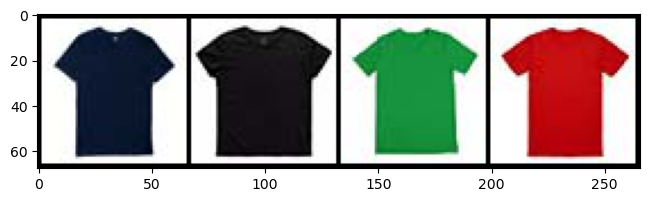

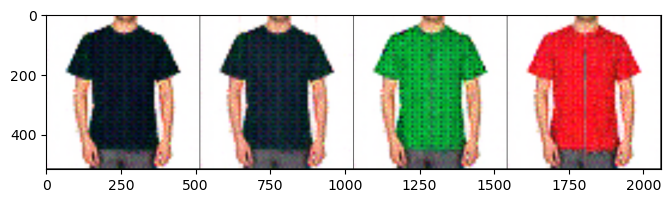

In [163]:
# Visualize the reconstructed images
import matplotlib.pyplot as plt
print(img[0].shape)
n = min(img.size(0), 8)
#comparison = torch.cat([img[:n], recon[:n]])

comparison = img
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()

comparison = recon
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()


! out: torch.Size([4, 128, 4, 4]) input: torch.Size([1, 3, 64, 64]) predict: torch.Size([1, 3, 512, 512])
torch.Size([3, 64, 64])


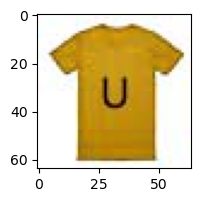

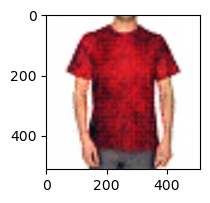

In [125]:
my_testdataset = TestDataset()
my_testdataloader = torch.utils.data.DataLoader(my_testdataset, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    for data in my_testdataloader:
        img = data
        encoded, recon = model(img)
        print('!','out:',_.shape,'input:',img.shape,'predict:',recon.shape)
        break
        
print(img[0].shape)
n = min(img.size(0), 8)
#comparison = torch.cat([img[:n], recon[:n]])

comparison = img
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()

comparison = recon
comparison = comparison.cpu()
plt.figure(figsize=(n*2, 2))
plt.imshow(torchvision.utils.make_grid(comparison, nrow=n).permute(1, 2, 0))
plt.show()       
